<a href="https://colab.research.google.com/github/AtharvaJ-236/Data-Science/blob/main/DS%20Prac6%20Simple%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Fifa_world_cup_matches.csv to Fifa_world_cup_matches.csv


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
# Load dataset
df = pd.read_csv('Fifa_world_cup_matches.csv')

# Preview data
df.head()


,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


In [4]:
# Data analysis
df.describe()


,number of goals team1,number of goals team2,total attempts team1,total attempts team2,conceded team1,conceded team2,goal inside the penalty area team1,goal inside the penalty area team2,goal outside the penalty area team1,goal outside the penalty area team2,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,1.578125,1.109375,11.140625,11.281250,1.109375,1.578125,1.468750,0.984375,0.093750,0.109375,...,0.140625,0.125000,11.593750,11.359375,0.015625,0.015625,71.968750,70.125000,289.750000,293.265625
std,1.551289,1.055856,4.972519,5.807682,1.055856,1.551289,1.563155,0.999876,0.293785,0.314576,...,0.350382,0.377964,5.911299,4.990045,0.125000,0.125000,14.394629,13.531269,88.406888,80.916230
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,38.000000,44.000000,139.000000,141.000000
25%,0.000000,0.000000,8.000000,7.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.750000,8.000000,0.000000,0.000000,63.000000,60.250000,229.000000,233.750000
50%,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,11.000000,10.000000,0.000000,0.000000,71.000000,72.000000,281.000000,292.500000
75%,2.000000,2.000000,14.000000,14.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,14.000000,14.000000,0.000000,0.000000,83.500000,79.000000,328.000000,327.500000
max,7.000000,4.000000,25.000000,32.000000,4.000000,7.000000,7.000000,4.000000,1.000000,1.000000,...,1.000000,2.000000,32.000000,26.000000,1.000000,1.000000,101.000000,104.000000,637.000000,585.000000


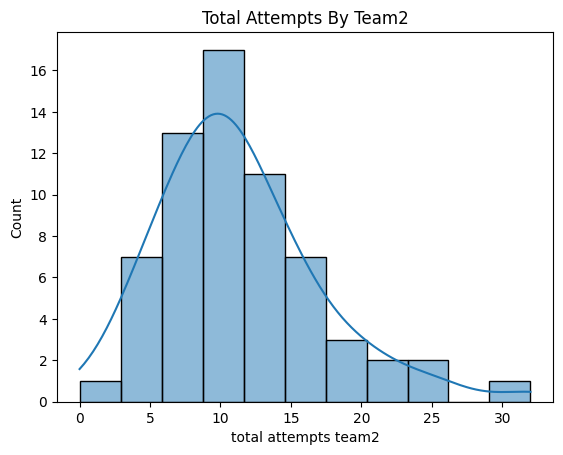

In [6]:
# Distribution of Salary
plt.title('Total Attempts By Team2')
sns.histplot(df['total attempts team2'], kde=True)
plt.show()


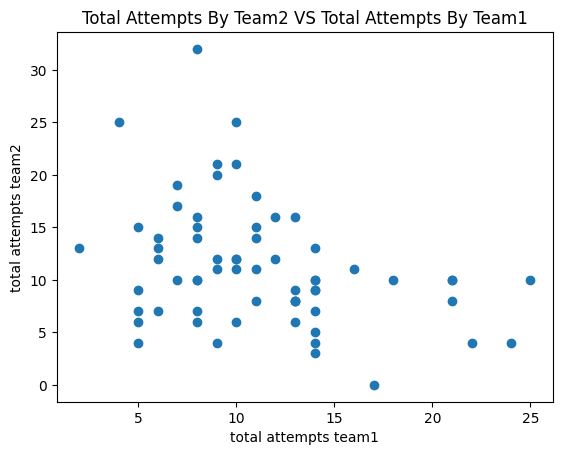

In [7]:
# Salary vs Experience Scatter Plot
plt.scatter(df['total attempts team1'], df['total attempts team2'])
plt.title('Total Attempts By Team2 VS Total Attempts By Team1')
plt.xlabel('total attempts team1')
plt.ylabel('total attempts team2')
plt.show()


In [8]:
# Independent (X) and Dependent (y) variables
X = df[['total attempts team1']]
y = df['total attempts team2']


In [10]:
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=0
)


In [11]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [12]:
# Predictions
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)


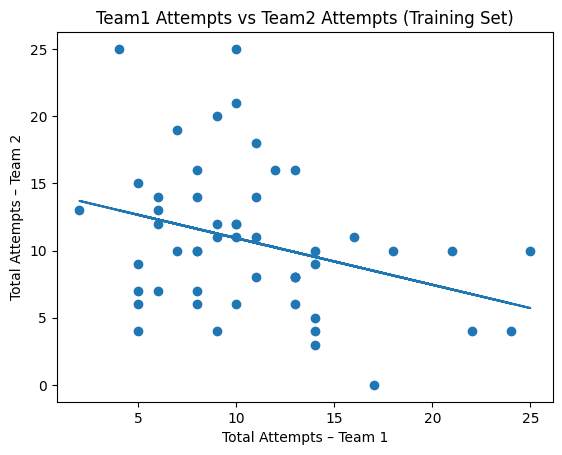

In [13]:
# Visualizing Training set results
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred_train)
plt.title('Team1 Attempts vs Team2 Attempts (Training Set)')
plt.xlabel('Total Attempts – Team 1')
plt.ylabel('Total Attempts – Team 2')
plt.show()


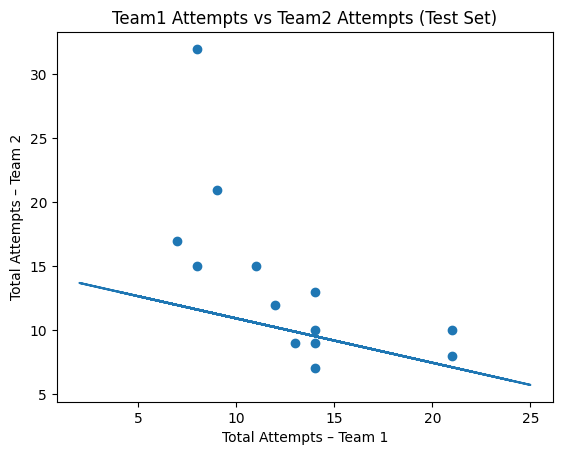

In [14]:
# Visualizing Test set results
plt.scatter(X_test, y_test)
plt.plot(X_train, y_pred_train)
plt.title('Team1 Attempts vs Team2 Attempts (Test Set)')
plt.xlabel('Total Attempts – Team 1')
plt.ylabel('Total Attempts – Team 2')
plt.show()


In [15]:
# Model coefficients
print("Slope (Coefficient):", regressor.coef_[0])
print("Intercept:", regressor.intercept_)


Slope (Coefficient): -0.34687480794050746
Intercept: 14.387069018499167


In [16]:
# Custom prediction
example = [[15]]
predicted_attempts = regressor.predict(example)

print("Predicted Team2 attempts:", predicted_attempts[0])


Predicted Team2 attempts: 9.183946899391554


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
